In [134]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [135]:
hdul = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
hdu = hdul[0]
data = hdu.data

In [136]:
data_USE = np.transpose(data)
Teff = np.array(data_USE[4,1,:])
nu_max = np.array(data_USE[2,0,:])

In [137]:
hdul = fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.5.4.fits")
hdu = hdul[1]
hdu.header #should show all column headers

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2272 / length of dimension 1                          
NAXIS2  =                23363 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  430 / number of table fields                         
TTYPE1  = 'KEPLER_ID'                                                           
TFORM1  = '20A     '                                                            
TTYPE2  = 'KEPLER_INT'                                                          
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [138]:
Logg_A = hdu.data['LOGG_COR']
Logg_err = hdu.data['LOGG_COR_ERR']
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
FeH_A = hdu.data['FE_H_ADOP_COR']
#print(max(FeH_A))
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
FeH_FIT = hdu.data['FE_H_ADOP_FIT']
Teff_FIT = hdu.data['TEFF_FIT']

In [139]:
import pandas as pd
with fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.5.4.fits") as data:
    df = pd.DataFrame(data[0].data)

In [140]:
KIC_num = hdu.data['KEPLER_INT']
hdul_back = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
hdu_back = hdul_back[0]
data_back = hdu_back.data
data_USE_back = np.transpose(data_back)
KIC_back = np.array(data_USE[0,0,:])
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
Logg_err = hdu.data['LOGG_COR_ERR']
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
logg_A = hdu.data['LOGG_COR']
FeH_A = hdu.data['FE_H_ADOP_COR']
Huber_radius = hdu.data['HUBER_R']
Huber_radius_P_err = hdu.data['HUBER_R_PERR']
Huber_radius_M_err = hdu.data['HUBER_R_MERR']
Berger_radius = hdu.data['BERGER_RADIUS']
Berger_radius_P_err = hdu.data['BERGER_RADIUS_PERR']
Berger_radius_M_err = hdu.data['BERGER_RADIUS_MERR']
#print(Huber_radius_err)
Amp_HV1 = np.array(data_USE[6,0,:])
Amp_HV1_err = np.array(data_USE[6,1,:])
Amp_HV2 = np.array(data_USE[9,0,:])
Amp_HV2_err = np.array(data_USE[9,1,:])
Freq_HV1 = np.array(data_USE[7,0,:])
Freq_HV1_err = np.array(data_USE[7,1,:])
Freq_HV2 = np.array(data_USE[10,0,:])
Freq_HV2_err = np.array(data_USE[10,1,:])
Evol_stage = np.array(data_USE[3, 0, :])
#Evol_stage
#Evol_stage = 1 - red giant, #2- red clump
#make color coded plot (or seperate ones for red giant branch and red clump) after other backg. plots

In [141]:
#FOR HUBER
common_KIC, Teff_indexes, Amp_indexes = np.intersect1d(KIC_num, KIC_back, return_indices=True)
good_indecies = np.where(Teff_A[Teff_indexes]*Huber_radius[Teff_indexes] > 0)
#good_indecies_B = np.where(Teff_A[Teff_indexes]*Berger_radius[Teff_indexes] > 0)
print(np.where(Teff_A[Teff_indexes] < 0))
print(np.where(Huber_radius[Teff_indexes] < 0))
print(np.where(Berger_radius[Teff_indexes] < 0))

Amp_indexes = Amp_indexes[good_indecies]
Teff_indexes = Teff_indexes[good_indecies]
#Teff_indexes_B = Teff_indexes[good_indecies_B]
logg_final = Logg_A[Teff_indexes]
logg_final_err = Logg_err[Teff_indexes]
Teff_final = Teff_A[Teff_indexes]
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[Teff_indexes]
Teff_err_log = ((Teff_final_err)/(Teff_final))/np.log(10)

Huber_radius_final = Huber_radius[Teff_indexes]
Huber_radius_err_final = (np.sqrt(Huber_radius_P_err[Teff_indexes])) * (np.sqrt(np.abs(Huber_radius_M_err[Teff_indexes])))

Berger_radius_final = Berger_radius[Teff_indexes]
Berger_radius_err_final = (np.sqrt(np.abs(Berger_radius_P_err[Teff_indexes]))) * (np.sqrt(np.abs(Berger_radius_M_err[Teff_indexes])))

print(Huber_radius_err_final)

print(Huber_radius_err_final/Huber_radius_final)
FeH_final = FeH_A[Teff_indexes]
FeH_final_err = FeH_err[Teff_indexes]
Amp_HV1_final = Amp_HV1[Amp_indexes]
rpw = 2
Amp_HV1_R =  Amp_HV1[Amp_indexes] * Huber_radius_final**rpw
Amp_HV1_final_err = Amp_HV1_err[Amp_indexes]
print(Amp_HV1_final_err)
Amp_HV1_R_err = ((Amp_HV1_final_err/Amp_HV1_final) + (rpw*Huber_radius_err_final/Huber_radius_final)) * Amp_HV1_R
print(Amp_HV1_R_err)
Amp_HV2_final = Amp_HV2[Amp_indexes]
Amp_HV2_final_err = Amp_HV2_err[Amp_indexes]
Amp_HV2_R = Amp_HV2_final * Huber_radius_final**rpw
Amp_HV2_R_err = ((Amp_HV2_final_err/Amp_HV2_final) + (rpw*Huber_radius_err_final/Huber_radius_final)) * Amp_HV2_R
print(Amp_HV2_final_err/Amp_HV2_final)
print(Amp_HV2_R_err/Amp_HV2_R)
Evol_stage_final = Evol_stage[Amp_indexes]
#print(Evol_stage_final)
Freq_HV1_final = Freq_HV1[Amp_indexes]
Freq_HV1_final_err = Freq_HV1_err[Amp_indexes]
Freq_HV2_final = Freq_HV2[Amp_indexes]
Freq_HV2_final_err = Freq_HV2_err[Amp_indexes]
Amp_HV1_err_log = ((Amp_HV1_final_err)/(Amp_HV1_final))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_final_err)/(Amp_HV2_final))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_final_err)/(Freq_HV1_final))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_final_err)/(Freq_HV2_final))/np.log(10)
Amp_HV1_R_err_log = ((Amp_HV1_R_err)/(Amp_HV1_R))/np.log(10)
Amp_HV2_R_err_log = ((Amp_HV2_R_err)/(Amp_HV2_R))/np.log(10)

(array([ 318,  761,  794, 2156, 2211, 3250, 3297, 3401, 3605]),)
(array([639]),)
(array([  77,   94,  438,  568,  579,  729,  910,  936, 1197, 1216, 1271,
       1295, 1379, 1539, 1585, 1655, 1656, 1667, 1717, 1771, 1810, 1876,
       1888, 1927, 1940, 1955, 2020, 2039, 2101, 2104, 2124, 2164, 2185,
       2245, 2270, 2273, 2538, 2543, 2595, 2705, 2760, 2793, 2830, 2935,
       2997, 3016, 3038, 3123, 3124, 3151, 3197, 3354, 3371, 3374, 3448,
       3454, 3466, 3625, 3636, 3779, 3783, 3887, 3934, 3953]),)
[1.7242533 2.211651  2.1797092 ... 3.7342916 2.2147913 1.7258259]
[0.1796846  0.1295864  0.12904559 ... 0.21533224 0.1396904  0.16212548]
[ 103.12402906  644.14808811  469.43677855 ... 1264.3873675   612.43433845
  370.48811596]
[ 118029.22307632 1201752.80597119  937936.10182892 ... 3311722.18586355
 1061998.1288908   379290.66417746]
[0.06446614 0.13967215 0.10261896 ... 0.09464093 0.0929494  0.08965754]
[0.42383533 0.39884494 0.36071014 ... 0.52530541 0.3723302  0.41390851]


In [142]:
#%matplotlib inline
#figure(figsize=(8,8), dpi=100)
#plt.grid()

red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RG')
print(A1_opt)
print(A1_perr)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RC')
print(A1_opt)
print(A1_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RG')
print(A2_opt)
print(A2_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RC')
print(A2_opt)
print(A2_perr)


def logg_fit(X, a, b):
    x = X
    return a + b*x
         
mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(np.log10(Teff_final[red_giant]))

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))

#print(logg_opt)
#print(logg_perr)

logg_opt[1] = 18.614913/0.7
theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#print(theta)

#rotated plots
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))

#print(logg_opt[0])

#print(x_prime)
#print(y_prime)

coeffs = np.ones((4, 6, 2))
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1_final[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1_final[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2_final[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2_final[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

#plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
#plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], '.', ms=1)
#plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x')
#plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, '.', ms=1)
#plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
#plt.ylim(1.9, 3.4)
#plt.xlabel('Teff')
#plt.ylabel('log(g)')
#plt.show()

A1_RG
[ 4.39372805e+01 -9.81142386e+00 -1.56287826e+00 -3.18180703e-02]
[1.86490824 0.52365778 0.02480848 0.01635822]
A1_RC
[ 76.84846017 -19.34750036  -0.60715583  -0.80702136]
[1.92789712 0.54355663 0.04246164 0.02359386]
A2_RG
[ 3.99003104e+01 -8.76840572e+00 -1.73252317e+00 -1.79513846e-02]
[2.05638842 0.57716446 0.02704051 0.01784273]
A2_RC
[ 78.15099705 -19.81187651  -0.70185892  -0.93976803]
[2.18056612 0.61335822 0.04567743 0.02631364]
A1_RG
[ 3.6581317  -9.74576915 -1.93046519 -0.03181817]
[0.00383677 0.52411414 0.01171757 0.01635822]
A1_RC
[  4.08887777 -19.31102467  -1.33376154  -0.80702153]
[0.01173118 0.5442996  0.03153781 0.02359385]
A2_RG
[ 2.99829498 -8.69710663 -2.06079611 -0.01795128]
[0.00425794 0.57765488 0.01283991 0.01784273]
A2_RC
[  3.4291334  -19.77150844  -1.44584802  -0.93976798]
[0.01267441 0.61411842 0.03396103 0.02631364]


In [144]:
#fit in rotated atm params with respect to Huber R corrected amps
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d
def logg_fit(X, a, b):
    x = X
    return a + b*x
def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d
red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)
mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(np.log10(Teff_final[red_giant]))
logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7
theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_R[red_giant]), sigma=(Amp_HV1_R_err_log[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_R[red_clump]), sigma=(Amp_HV1_R_err_log[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_R[red_giant]), sigma=(Amp_HV2_R_err_log[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_R[red_clump]), sigma=(Amp_HV2_R_err_log[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.70604619  1.59585196 -3.0346698   0.54054826]
[0.01173663 1.79819148 0.03674325 0.05486409]
A1_RC
[  6.49953448 -27.50000357  -1.88275344  -1.02071524]
[0.03134636 1.43582981 0.08459689 0.06259716]
A2_RG
[ 5.04215579  1.48774337 -3.15109885  0.51854479]
[0.01172101 1.79443374 0.03682849 0.05454112]
A2_RC
[  5.84137804 -27.93550566  -1.97248736  -1.13025142]
[0.03112966 1.44722494 0.08394419 0.06290103]


In [145]:
#matched subsample of giants+clump of A1 with Huber R
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)
#ia = iu[0,:]
index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))
#iu = np.reshape(iu, (1, N_iu))
#print(min(iu))
#print(max(iu))
#print(type(index_RG))
#print(type(red_giant))
#print(np.shape(log_Teff_final_RG[index_RG]))
#print(np.shape(Amp_HV1_RG[index_RG]))


#print(np.shape(iu))
#print(np.shape(index_RG))
index_RC = index_RC[iu]
index_RG = index_RG[iu]
#print(np.size(index_RG))

#amplitude 1 red giants subsample
Amp_HV1_RG = Amp_HV1_R[red_giant]
Amp_HV1_RC = Amp_HV1_R[red_clump]
#print(np.size(index_RC), np.size(index_RG))
#print(Ni_RC, Ni_RG)
index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
#print(np.shape(index_inliers))
#print(np.shape(index_RC))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_R_err_log[red_giant]
#Amp_HV1_RG = Amp_HV1_final[red_giant]
#Amp_HV1_err_log_RG = Amp_HV1_err_log[red_giant]
#print(np.shape(Amp_HV1_err_log_RG[index_RG]))
#print(min(Amp_HV1_err_log_RG), max(Amp_HV1_err_log_RG))
#print(Amp_HV1_err_log[red_giant[index_RG]])

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

#amp 1 red clump subsample
#Amp_HV1_RC = Amp_HV1_final[red_clump]
#Amp_HV1_err_log_RC = Amp_HV1_err_log[red_clump]

Amp_HV1_err_log_RC = Amp_HV1_R_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

A1_RG_s
[225.38407447 -59.19580459  -0.73564953  -0.87374275]
[26.40957441  7.36070968  0.32742318  0.26178811]
A1_RC_s
[37.90400953 -8.18004003 -0.45577363 -0.35894887]
[28.51961526  7.93668126  0.33651014  0.25479792]


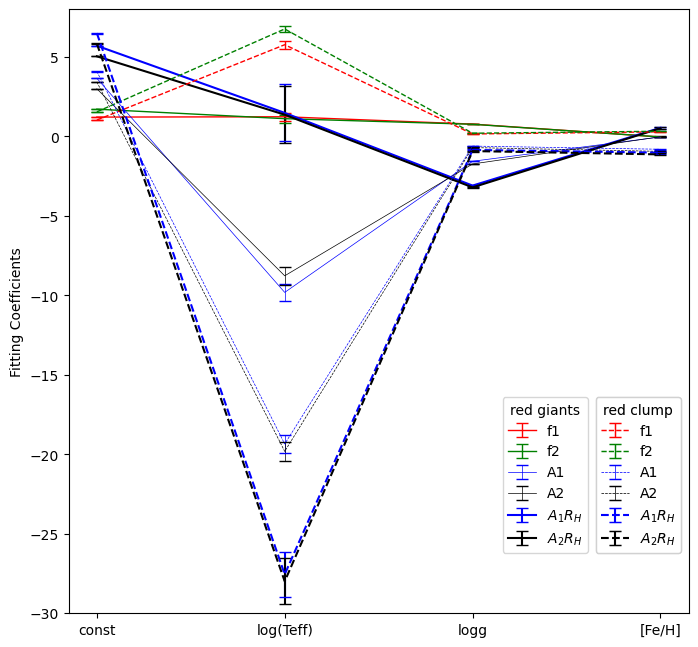

In [146]:
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

#transformed coefficient plot from Radius overplotted on untransformed one

%matplotlib inline
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_H$') 
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_H$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_H$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_H$') #R^2
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for Huber radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.show()

In [147]:
#FOR BERGER
common_KIC, Teff_indexes, Amp_indexes = np.intersect1d(KIC_num, KIC_back, return_indices=True)
good_indecies = np.where(Teff_A[Teff_indexes]*Berger_radius[Teff_indexes] > 0)
print(np.where(Teff_A[Teff_indexes] < 0))
print(np.where(Berger_radius[Teff_indexes] < 0))

Amp_indexes = Amp_indexes[good_indecies]
Teff_indexes = Teff_indexes[good_indecies]
logg_final = Logg_A[Teff_indexes]
logg_final_err = Logg_err[Teff_indexes]
Teff_final = Teff_A[Teff_indexes]
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[Teff_indexes]
Teff_err_log = ((Teff_final_err)/(Teff_final))/np.log(10)

Berger_radius_final = Berger_radius[Teff_indexes]
Berger_radius_err_final = (np.sqrt(Berger_radius_P_err[Teff_indexes])) * (np.sqrt(np.abs(Berger_radius_M_err[Teff_indexes])))


FeH_final = FeH_A[Teff_indexes]
FeH_final_err = FeH_err[Teff_indexes]
Amp_HV1_final = Amp_HV1[Amp_indexes]

rpw = 2
Amp_HV1_R =  Amp_HV1[Amp_indexes] * Berger_radius_final**rpw
Amp_HV1_final_err = Amp_HV1_err[Amp_indexes]
#print(Amp_HV1_final_err)
Amp_HV1_R_err = ((Amp_HV1_final_err/Amp_HV1_final) + (rpw*Berger_radius_err_final/Berger_radius_final)) * Amp_HV1_R
#print(Amp_HV1_R_err)
Amp_HV2_final = Amp_HV2[Amp_indexes]
Amp_HV2_final_err = Amp_HV2_err[Amp_indexes]
Amp_HV2_R = Amp_HV2_final * Berger_radius_final**rpw
Amp_HV2_R_err = ((Amp_HV2_final_err/Amp_HV2_final) + (rpw*Berger_radius_err_final/Berger_radius_final)) * Amp_HV2_R
#print(Amp_HV2_final_err/Amp_HV2_final)
#print(Amp_HV2_R_err/Amp_HV2_R)

Evol_stage_final = Evol_stage[Amp_indexes]
print(Evol_stage_final)
Freq_HV1_final = Freq_HV1[Amp_indexes]
Freq_HV1_final_err = Freq_HV1_err[Amp_indexes]
Freq_HV2_final = Freq_HV2[Amp_indexes]
Freq_HV2_final_err = Freq_HV2_err[Amp_indexes]
Amp_HV1_err_log = ((Amp_HV1_final_err)/(Amp_HV1_final))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_final_err)/(Amp_HV2_final))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_final_err)/(Freq_HV1_final))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_final_err)/(Freq_HV2_final))/np.log(10)
Amp_HV1_R_err_log = ((Amp_HV1_R_err)/(Amp_HV1_R))/np.log(10)
Amp_HV2_R_err_log = ((Amp_HV2_R_err)/(Amp_HV2_R))/np.log(10)
#print(Amp_HV1, Amp_HV1_final_err)
#print(Amp_HV1_err_log, Amp_HV2_err_log, Freq_HV1_err_log, Freq_HV2_err_log)
#print(Amp_HV1_final_err, Amp_HV2_final_err, Freq_HV1_final_err, Freq_HV2_final_err)
#Teff_final = Teff_final[good_indecies]
#print(FeH_final)
#print(min(FeH_final))
#print(max(FeH_final))
#np.size(Teff_final)
np.size(Amp_indexes)

(array([ 318,  761,  794, 2156, 2211, 3250, 3297, 3401, 3605]),)
(array([  77,   94,  438,  568,  579,  729,  910,  936, 1197, 1216, 1271,
       1295, 1379, 1539, 1585, 1655, 1656, 1667, 1717, 1771, 1810, 1876,
       1888, 1927, 1940, 1955, 2020, 2039, 2101, 2104, 2124, 2164, 2185,
       2245, 2270, 2273, 2538, 2543, 2595, 2705, 2760, 2793, 2830, 2935,
       2997, 3016, 3038, 3123, 3124, 3151, 3197, 3354, 3371, 3374, 3448,
       3454, 3466, 3625, 3636, 3779, 3783, 3887, 3934, 3953]),)
[1. 2. 2. ... 2. 2. 1.]


3927

In [148]:
#%matplotlib inline
#figure(figsize=(8,8), dpi=100)
#plt.grid()

red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RG')
print(A1_opt)
print(A1_perr)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RC')
print(A1_opt)
print(A1_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RG')
print(A2_opt)
print(A2_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RC')
print(A2_opt)
print(A2_perr)


def logg_fit(X, a, b):
    x = X
    return a + b*x
         
mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(np.log10(Teff_final[red_giant]))

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))

#print(logg_opt)
#print(logg_perr)

logg_opt[1] = 18.614913/0.7
theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#print(theta)

#rotated plots
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))

#print(logg_opt[0])

#print(x_prime)
#print(y_prime)

coeffs = np.ones((4, 6, 2))
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1_final[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1_final[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2_final[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2_final[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

#plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
#plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], '.', ms=1)
#plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x')
#plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, '.', ms=1)
#plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
#plt.ylim(1.9, 3.4)
#plt.xlabel('Teff')
#plt.ylabel('log(g)')
#plt.show()

A1_RG
[ 4.45594311e+01 -9.98438304e+00 -1.55751684e+00 -3.30082291e-02]
[1.88787278 0.53005624 0.02505284 0.01646716]
A1_RC
[ 77.23825951 -19.44710076  -0.61662369  -0.81101152]
[1.9615564  0.55327594 0.0432444  0.02394999]
A2_RG
[ 4.03653599e+01 -8.89651854e+00 -1.73001096e+00 -1.77097027e-02]
[2.08219757 0.58434489 0.02730039 0.01796302]
A2_RC
[ 78.37598478 -19.86897985  -0.70794129  -0.94375058]
[2.21111247 0.62209847 0.04636298 0.02662492]
A1_RG
[ 3.6584528  -9.91879831 -1.931607   -0.03300812]
[0.00388146 0.5305163  0.01182241 0.01646716]
A1_RC
[  4.08586259 -19.41019274  -1.34696557  -0.81101145]
[0.01194772 0.55404474 0.03191825 0.02394999]
A2_RG
[ 2.99878568 -8.82522442 -2.06309983 -0.01770962]
[0.00430989 0.58483884 0.01294969 0.01796302]
A2_RC
[  3.42663649 -19.82834709  -1.45407187  -0.94375069]
[0.01286129 0.62287779 0.03434194 0.02662492]


In [150]:
#fit in rotated atm params with respect to BERGER R corrected amps
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d
def logg_fit(X, a, b):
    x = X
    return a + b*x
def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d
red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)
mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(np.log10(Teff_final[red_giant]))
logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7
theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_R[red_giant]), sigma=(Amp_HV1_R_err_log[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_R[red_clump]), sigma=(Amp_HV1_R_err_log[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_R[red_giant]), sigma=(Amp_HV2_R_err_log[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_R[red_clump]), sigma=(Amp_HV2_R_err_log[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.55321069 -4.30843426 -2.91829706  0.30372775]
[0.00593191 0.90035893 0.01849402 0.02737736]
A1_RC
[  6.17848606 -20.83722078  -1.45276425  -0.74513657]
[0.01481864 0.6905963  0.04082442 0.02992802]
A2_RG
[ 4.88683216 -3.87525152 -3.04587459  0.30709344]
[0.00635599 0.95444336 0.01972958 0.02892292]
A2_RC
[  5.51505326 -21.37335262  -1.57916739  -0.88497017]
[0.01597037 0.75411192 0.04385667 0.03251381]


In [151]:
#matched subsample of giants+clump of A1 with Huber R
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)
#ia = iu[0,:]
index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))
#iu = np.reshape(iu, (1, N_iu))
#print(min(iu))
#print(max(iu))
#print(type(index_RG))
#print(type(red_giant))
#print(np.shape(log_Teff_final_RG[index_RG]))
#print(np.shape(Amp_HV1_RG[index_RG]))


#print(np.shape(iu))
#print(np.shape(index_RG))
index_RC = index_RC[iu]
index_RG = index_RG[iu]
#print(np.size(index_RG))

#amplitude 1 red giants subsample
Amp_HV1_RG = Amp_HV1_R[red_giant]
Amp_HV1_RC = Amp_HV1_R[red_clump]
#print(np.size(index_RC), np.size(index_RG))
#print(Ni_RC, Ni_RG)
index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
#print(np.shape(index_inliers))
#print(np.shape(index_RC))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_R_err_log[red_giant]
#Amp_HV1_RG = Amp_HV1_final[red_giant]
#Amp_HV1_err_log_RG = Amp_HV1_err_log[red_giant]
#print(np.shape(Amp_HV1_err_log_RG[index_RG]))
#print(min(Amp_HV1_err_log_RG), max(Amp_HV1_err_log_RG))
#print(Amp_HV1_err_log[red_giant[index_RG]])

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

#amp 1 red clump subsample
#Amp_HV1_RC = Amp_HV1_final[red_clump]
#Amp_HV1_err_log_RC = Amp_HV1_err_log[red_clump]

Amp_HV1_err_log_RC = Amp_HV1_R_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

A1_RG_s
[159.07785178 -40.81043619  -1.28923316  -0.32692521]
[22.00055667  6.12308894  0.27420253  0.19756987]
A1_RC_s
[ 71.78647442 -17.61129619  -0.28497487  -0.51120078]
[13.17907212  3.65925821  0.15646532  0.11824157]


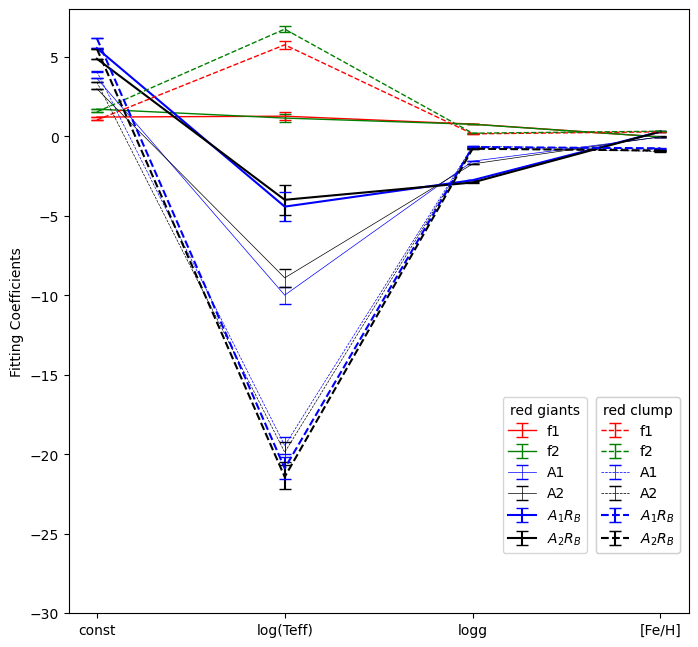

In [154]:
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

#transformed coefficient plot from BERGER Radius overplotted on untransformed one

%matplotlib inline
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_B$') 
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_B$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_B$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_B$') #R^2
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for Huber radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.show()

0.107 28.964
3.8841288 24.917017


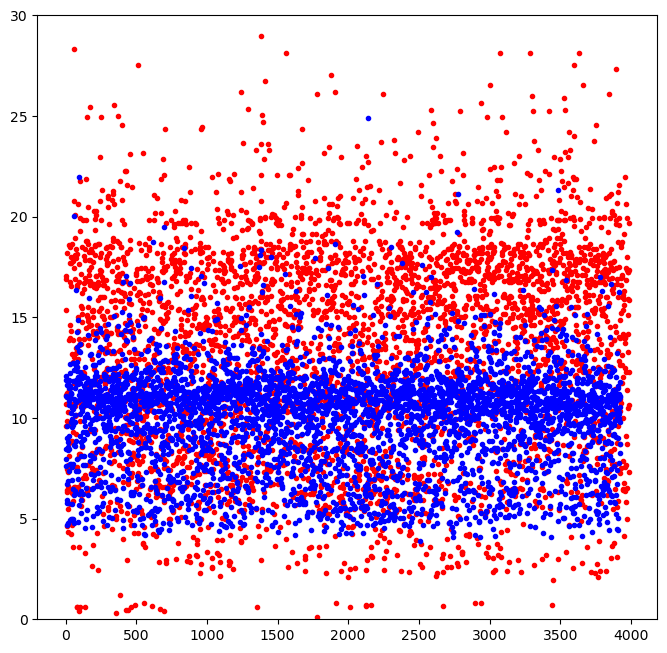

In [153]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.ylim(0, 30)  
plt.plot(Huber_radius_final, 'r.')
plt.plot(Berger_radius_final, 'b.')
print(min(Huber_radius_final), max(Huber_radius_final))
print(min(Berger_radius_final), max(Berger_radius_final)) 
#looks like Berger radius is more constrained -- more accurate data?
#see below graph